In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("marketing_campaign.csv")

In [3]:
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Data Cleaning¶
#cleaning the data is to remove missing values and inconsistances

#Removing rows with missing values

#Here we have two options:

#1) Replace the missing values with their respect column average or median

#2) Drop the rows having a missing value

#The column Income has 24 missing values, representing only 1% of the total. I believe we can drop them without any impact on the analysis.

In [6]:
# to remove the N/A values
data_cleaned = dataset.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data_cleaned))

The total number of data-points after removing the rows with missing values are: 2216


In [7]:
#Exploring the categorical features

In [8]:
print("Total categories in the feature Marital_Status:\n", data_cleaned["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data_cleaned["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [9]:
data_cleaned.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
# Calculate the age
data_cleaned['Age'] = 2021 - data_cleaned['Year_Birth']

#Total spendings on various items
data_cleaned["Spent"] = data_cleaned["MntWines"]+ data_cleaned["MntFruits"]+ data_cleaned["MntMeatProducts"]+ data_cleaned["MntFishProducts"]+ data_cleaned["MntSweetProducts"]+ data_cleaned["MntGoldProds"]

#Deriving living situation by marital status
data_cleaned["Living_With"] = data_cleaned["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

data_cleaned["Living_With"] = data_cleaned["Living_With"].replace({"Alone": 1, "Partner":2})
#Feature indicating total children living in the household
data_cleaned["Children"]=data_cleaned["Kidhome"]+data_cleaned["Teenhome"]

#Feature for total members in the householde
data_cleaned["Family_Size"] = data_cleaned["Living_With"] + data_cleaned["Children"]

#Segmenting education levels in three groups
data_cleaned["Education"]=data_cleaned["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data_cleaned=data_cleaned.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID", "Year_Birth"]
data_cleaned = data_cleaned.drop(to_drop, axis=1)

In [11]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

In [12]:
data_cleaned[['Age','Living_With', 'Children', 'Family_Size', 'Income', 'Spent', 'Complain']].describe()

,Age,Living_With,Children,Family_Size,Income,Spent,Complain
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52.179603,1.645307,0.947202,2.592509,52247.251354,607.075361,0.009477
std,11.985554,0.478528,0.749062,0.905722,25173.076661,602.900476,0.096907
min,25.000000,1.000000,0.000000,1.000000,1730.000000,5.000000,0.000000
25%,44.000000,1.000000,0.000000,2.000000,35303.000000,69.000000,0.000000
50%,51.000000,2.000000,1.000000,3.000000,51381.500000,396.500000,0.000000
75%,62.000000,2.000000,1.000000,3.000000,68522.000000,1048.000000,0.000000
max,128.000000,2.000000,3.000000,5.000000,666666.000000,2525.000000,1.000000


In [13]:
#Univariate Analysis

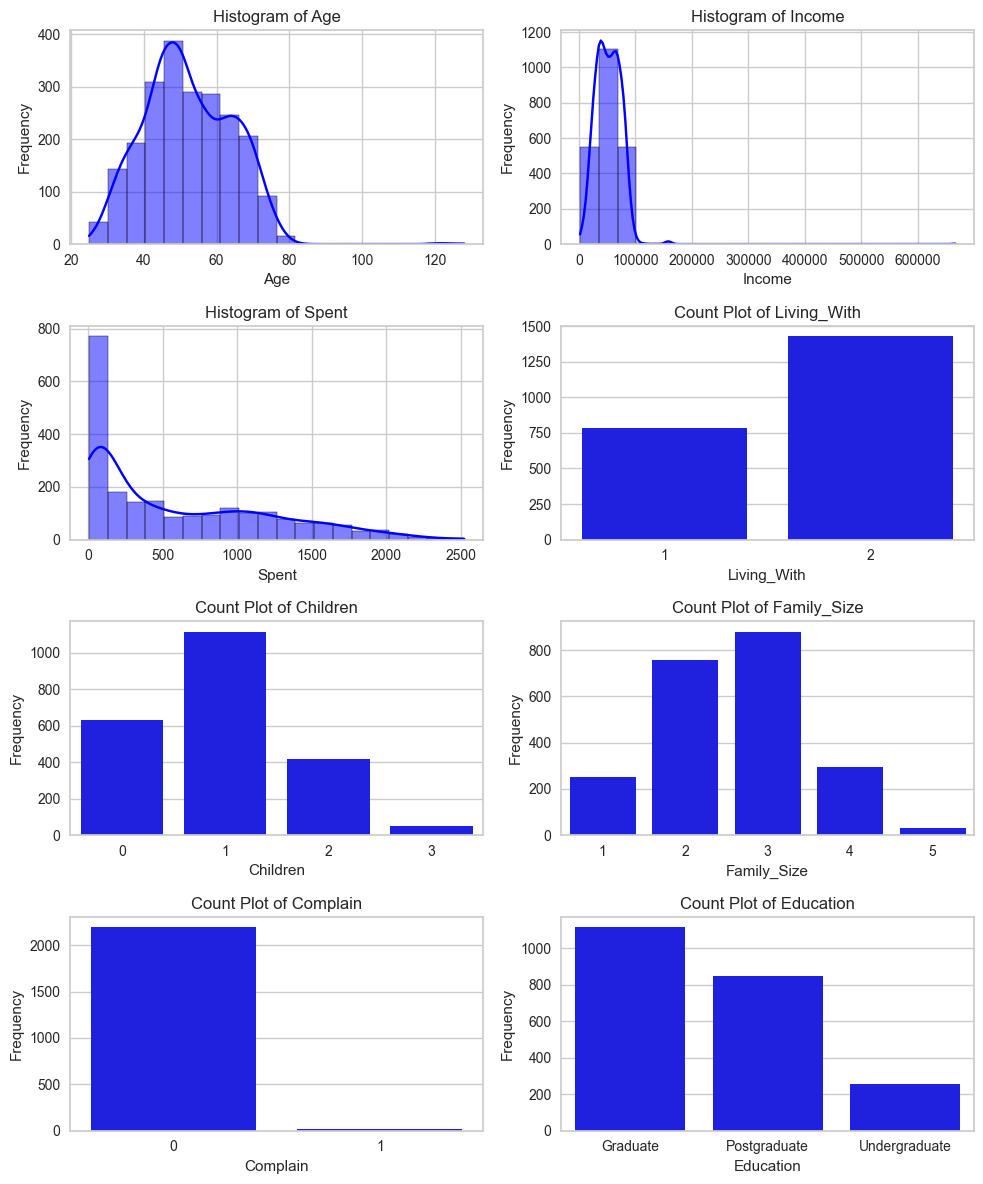

In [14]:
continuous_columns = ['Age', 'Income', 'Spent']
categorical_columns = ['Living_With', 'Children', 'Family_Size', 'Complain', 'Education']
all_columns = continuous_columns + categorical_columns

# Calculate the number of rows needed for two columns
num_rows = (len(all_columns) + 1) // 2

# Setup the matplotlib figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, num_rows * 3))
axes = axes.flatten()  # Flatten the axes array to make indexing easier

# Iterate over the columns and create appropriate plots
for i, col in enumerate(all_columns):
    if col in continuous_columns:
        sns.histplot(data=data_cleaned, x=col, bins=20, ax=axes[i], kde=True, color='blue')  # Add density curve for continuous data
        axes[i].set_title(f'Histogram of {col}')
    elif col in categorical_columns:
        sns.countplot(data=data_cleaned, x=col, ax=axes[i], color='blue')
        axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# If the number of columns is odd, hide the last subplot (if unused)
if len(all_columns) % 2 != 0:
    axes[-1].set_visible(False)  # Hide the last axis if not needed

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
#Bivariate Analysis (features correlation)¶
#Before proceed with the Data Preprocessing and the Machine Learning step, let's visualize the some data correlation and trends.

<function matplotlib.pyplot.show(close=None, block=None)>

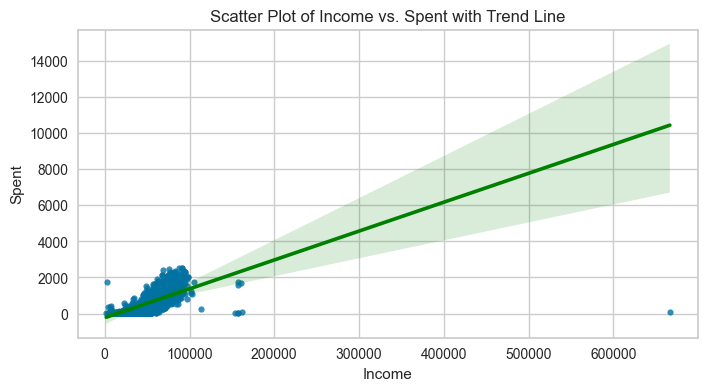

In [16]:
# Create the scatter plot with a regression line
plt.figure(figsize=(8, 4))
sns.regplot(x='Income', y='Spent', data=data_cleaned, scatter_kws={'s': 20}, line_kws={'color': 'green'})

plt.title('Scatter Plot of Income vs. Spent with Trend Line')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show

In [17]:
#Average Spent x Age groups

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


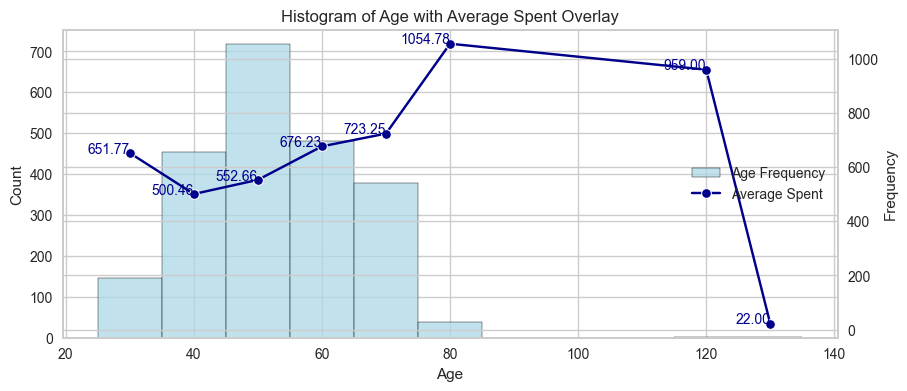

In [18]:
# Create bins for the 'Age' column
bins = np.arange(data_cleaned['Age'].min(), data_cleaned['Age'].max() + 10, 10)  # Adjust the bin width as necessary
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers

data_cleaned['Age_bins'] = pd.cut(data_cleaned['Age'], bins=bins, include_lowest=True)

# Group by the bins and calculate the mean of 'Spent'
grouped = data_cleaned.groupby(pd.cut(data_cleaned['Age'], bins=bins, labels=bin_centers))['Spent'].mean().reset_index()
grouped.columns = ['Age_bins', 'Spent']

# Plotting
plt.figure(figsize=(10, 4))
sns.histplot(data=data_cleaned, x='Age', bins=bins, color='lightblue', kde=False, stat='count', label='Age Frequency')

# Create a secondary y-axis for the line plot
ax2 = plt.twinx()
lineplot = sns.lineplot(data=grouped, x='Age_bins', y='Spent', ax=ax2, color='darkblue', marker='o', label='Average Spent')

# Setting labels and title
plt.title('Histogram of Age with Average Spent Overlay')
plt.xlabel('Age')
ax2.set_ylabel('Average Spent')
plt.ylabel('Frequency')

# Adding text labels at each point
for x, y in zip(grouped['Age_bins'], grouped['Spent']):
    ax2.text(x, y, f'{y:.2f}', color='darkblue', ha='right', size=10)

# Handling legends
handles, labels = [], []
for ax in plt.gcf().axes:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
plt.legend(handles, labels, loc='center right')

plt.show()

In [19]:
#Average Spent x Education and Family_Size

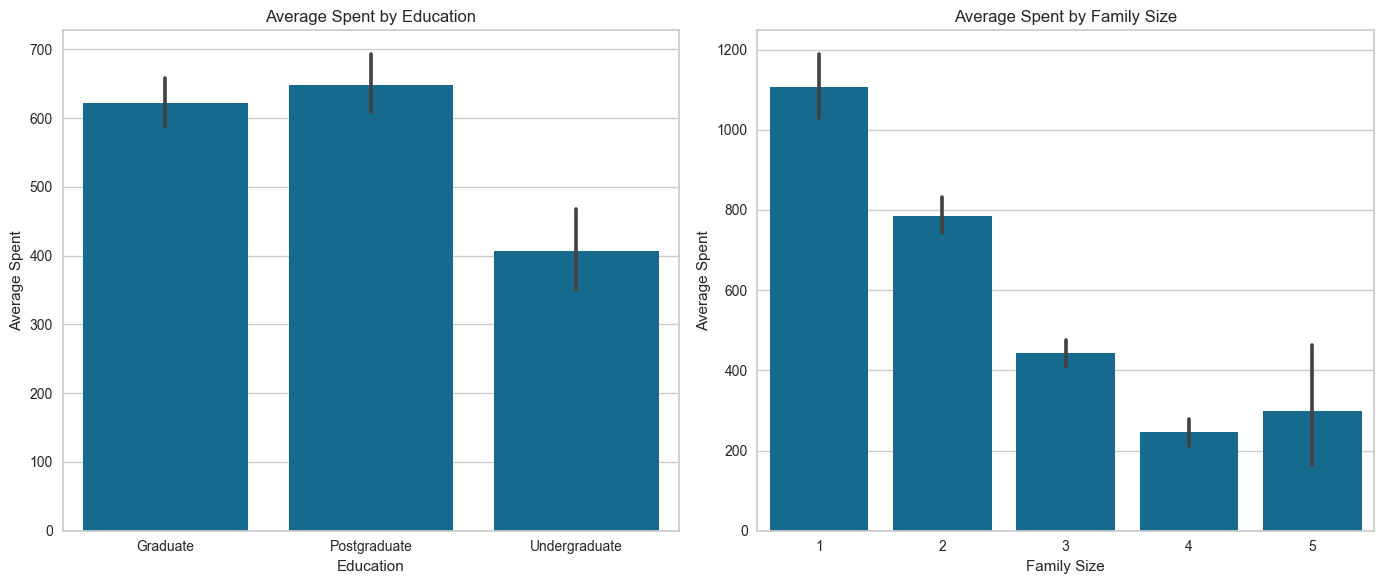

In [20]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# First subplot: Average "Spent" by "Education"
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(x='Education', y='Spent', data=data_cleaned)
plt.title('Average Spent by Education')
plt.xlabel('Education')
plt.ylabel('Average Spent')

# Second subplot: Average "Spent" by "Children"
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(x='Family_Size', y='Spent', data=data_cleaned)
plt.title('Average Spent by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Average Spent')

# Adjust layout
plt.tight_layout()

plt.show()

In [21]:
#Average Spent x Education and Family_Size

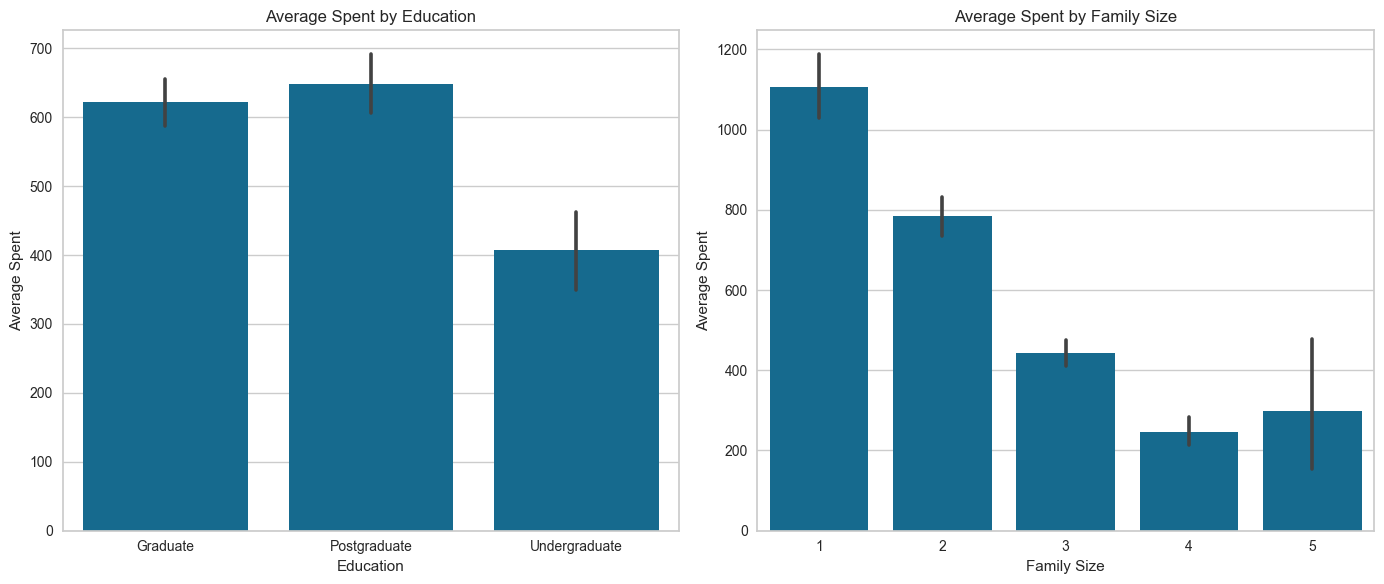

In [22]:
#Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# First subplot: Average "Spent" by "Education"
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(x='Education', y='Spent', data=data_cleaned)
plt.title('Average Spent by Education')
plt.xlabel('Education')
plt.ylabel('Average Spent')

# Second subplot: Average "Spent" by "Children"
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(x='Family_Size', y='Spent', data=data_cleaned)
plt.title('Average Spent by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Average Spent')

# Adjust layout
plt.tight_layout()

plt.show()

In [23]:
#Places of Purchase

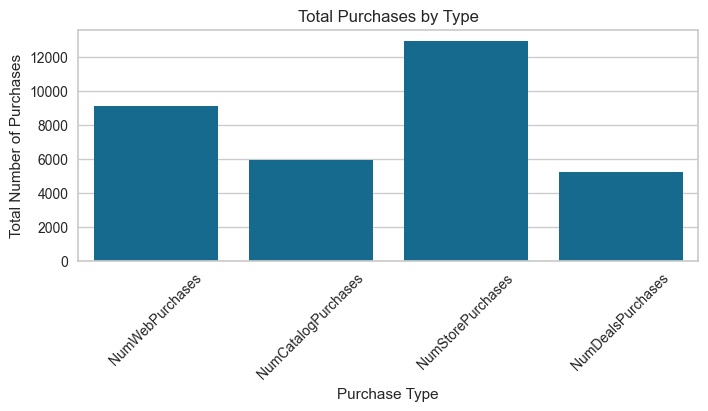

In [24]:
# Create a new dataframe that sums up each purchase type
totals = {
    'Purchase Type': ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'],
    'Total Purchases': [
        dataset['NumWebPurchases'].sum(),
        dataset['NumCatalogPurchases'].sum(),
        dataset['NumStorePurchases'].sum(),
        dataset['NumDealsPurchases'].sum()
    ]
}

df_totals = pd.DataFrame(totals)

# Create the bar chart
plt.figure(figsize=(8, 3))
sns.barplot(x='Purchase Type', y='Total Purchases', data=df_totals)
plt.title('Total Purchases by Type')

plt.ylabel('Total Number of Purchases')
plt.xticks(rotation=45)  # Rotates labels to avoid overlap
plt.show()